# Adult Income
<image src = "https://d32ijn7u0aqfv4.cloudfront.net/wp/wp-content/uploads/raw/SOBK0822001_780x440_mobile.jpeg">

# Library

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.impute import SimpleImputer

# Data Review

In [95]:
# data frame
df = pd.read_csv("data/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [96]:
print(f"Number of rows of data: {df.shape[0]}")
print(f"Number of columns of data: {df.shape[1]}")

Number of rows of data: 32561
Number of columns of data: 15


**Note**:

+ 1.	`Age`:	Describes the age of individuals. Continuous.
+ 2.	`Workclass`:	Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
+ 3.	`fnlwgt`:	Continuous. This is a weighting factor created by the US Census Bureau and indicates the number of people represented by each   data entry.
+ 4.	`education`:	Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
+ 5.	`education-num`:	Number of years spent in education. Continuous.
+ 6.	`marital-status`:	Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
+ 7.	`occupation`:	Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
+ 8.	`relationship`:	Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
+ 9.	`race`:	White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
+ 10.	`sex`:	Female, Male.
+ 11.	`capital-gain`:	Represents the profit an individual makes from the sale of assets (e.g., stocks or real estate). Continuous.
+ 12.	`capital-loss`:	Represents the loss an individual incurs from the sale of assets (e.g., stocks or real estate). Continuous.
+ 13.	`hours-per-week`:	Continuous.
+ 14.	`native-country`:	United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad & Tobago, Peru, Hong, Netherlands.
+ 15.	`salary`:	>50K, <=50K.

#### Check data information - Null, type

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [98]:
# Identify columns with null values
missing_columns = df.columns[df.isnull().any()]
print(missing_columns)

Index([], dtype='object')


Checking, all rows do not have null column values, but the data contains the character `"?"`, so this is a `null` value, filled in as a character.

<p>
  <img src="illustration/1.png" alt="Image 1" width="800"/>
  <img src="https://vnmedia2.monkeyuni.net/upload/web/img/cac-tu-nghi-van-trong-tieng-viet-3.jpg" alt="Image 2" width="300"/>
</p>

In [99]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [100]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K


In [101]:
# Identify columns with null values
missing_columns = df.columns[df.isnull().any()]
print(missing_columns)

Index(['workclass', 'occupation', 'native.country'], dtype='object')


In [102]:
'''Browse the unique values ​​in each column to get the most comprehensive overview 
of the values ​​in the data frame, and see the columns with `"nan"` values, 
and find ways to solve them to make the data more perfect.''' 

for column in list(df.columns):
    print(f"The unique values ​​of column ${column} are: \n {np.unique(df[column].astype(str))}")
    print()

The unique values ​​of column $age are: 
 ['17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '90']

The unique values ​​of column $workclass are: 
 ['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay' 'nan']

The unique values ​​of column $fnlwgt are: 
 ['100009' '100029' '100054' ... '99970' '99971' '99987']

The unique values ​​of column $education are: 
 ['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college']

The unique values ​​of column $education.num are: 
 ['1' '10' '11' '12' '13' '14' '15' '16' '

**Reviews:**

With `Number of rows of data: 32537`, We have columns with missing information:

+ `workclass`: ['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc''Self-emp-not-inc' 'State-gov' 'Without-pay' '`nan`']

+ `occupation`: ['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial' 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service' 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales' 'Tech-support' 'Transport-moving' '`nan`']

+ `native.country`: ['Cambodia' 'Canada' 'China' 'Columbia' 'Cuba' 'Dominican-Republic'
'Ecuador' 'El-Salvador' 'England' 'France' 'Germany' 'Greece' 'Guatemala'
'Haiti' 'Holand-Netherlands' 'Honduras' 'Hong' 'Hungary' 'India' 'Iran'
'Ireland' 'Italy' 'Jamaica' 'Japan' 'Laos' 'Mexico' 'Nicaragua'
'Outlying-US(Guam-USVI-etc)' 'Peru' 'Philippines' 'Poland' 'Portugal'
'Puerto-Rico' 'Scotland' 'South' 'Taiwan' 'Thailand' 'Trinadad&Tobago'
'United-States' 'Vietnam' 'Yugoslavia' '`nan`']


## Handling Missing Values

In [103]:
print(f"Total block missed in data frame: {df.isnull().sum().sum()}")

Total block missed in data frame: 4262


In [104]:
def CHECK_MISSING_PERCENTAGE():
    missing_count = df.isnull().sum()
    missing_percentage = round(missing_count / df.shape[0] * 100, 2)
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
    return missing_df

In [105]:
CHECK_MISSING_PERCENTAGE()

,count,percentage
age,0,0.00
workclass,1836,5.64
fnlwgt,0,0.00
education,0,0.00
education.num,0,0.00
marital.status,0,0.00
occupation,1843,5.66
relationship,0,0.00
race,0,0.00
sex,0,0.00


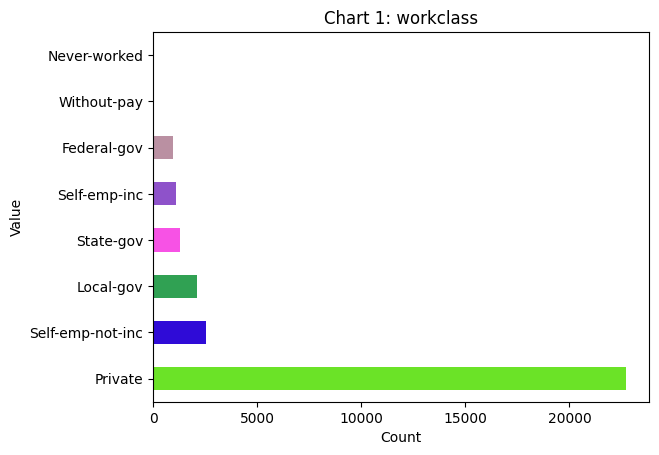

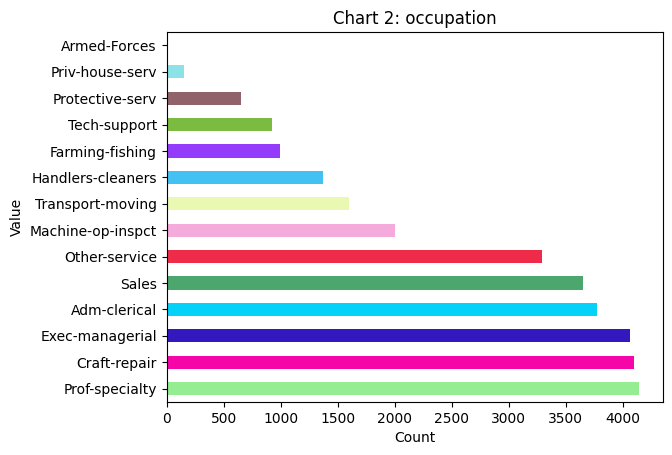

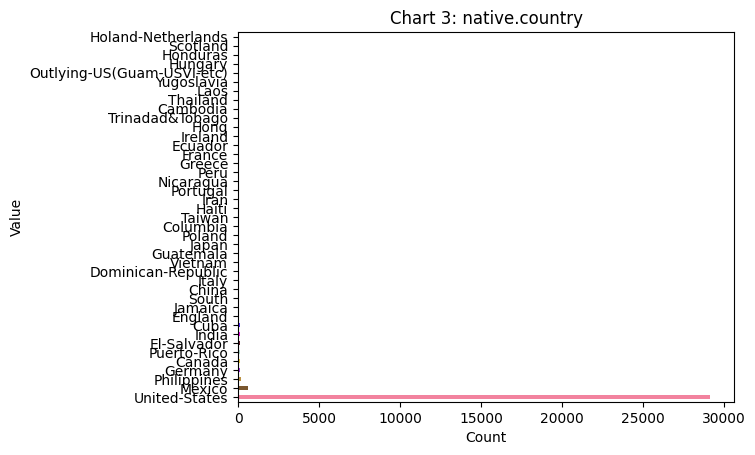

In [106]:
for idx,col in enumerate(missing_columns):
    value_counts = df[col].value_counts()
    count_unique = len(list(np.unique(df[col].astype(str))))
    colors = np.random.rand(count_unique, 3)
    value_counts.plot(kind='barh', color = colors)

    plt.title(f"Chart {idx + 1}: {col}")
    plt.xlabel('Count')
    plt.ylabel('Value')
    plt.show()

- So with charts 1 and 3, we can see that the percentage of numbers skewed to one column is very high, so with these two tables, we will fill in the most common values ​​in the cells.

- With chart 2, we will spread the values ​​evenly into the cells.

In [107]:
# Handle missing for 'workclass', 'native.country'
MODE_HANDLE_MISSING = ['workclass', 'native.country']

for col in MODE_HANDLE_MISSING:
    # Get mode value
    most_frequent_value = df[col].mode()[0]
    df[col] = df[col].fillna(most_frequent_value)
    
    print(f"Status of --{col}--: Success")


Status of --workclass--: Success
Status of --native.country--: Success


In [108]:
# Handle missing for 'occupation'
value_unique_occupation = list(np.unique(df['occupation'].astype(str)))
missing_indices_occupation = df[df['occupation'].isnull()].index
missing_indices_occupation

for i, idx in enumerate(missing_indices_occupation):
    df.at[idx, 'occupation'] = value_unique_occupation[i % len(value_unique_occupation)]
    
print("Status of --occupation--: Success")

Status of --occupation--: Success


In [109]:
CHECK_MISSING_PERCENTAGE()

,count,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education.num,0,0.0
marital.status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


So we have successfully solved the missing values.

### Duplicate handle

In [111]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 26


In [112]:
df.drop_duplicates(keep='first', inplace=True)
print("Duplicate resolved")

Duplicate resolved


In [114]:
"""
#Initial: 

Number of rows of data: 32561
Number of columns of data: 15

"""

print(f"Number of rows of data: {df.shape[0]}")
print(f"Number of columns of data: {df.shape[1]}")

Number of rows of data: 32535
Number of columns of data: 15


## Feature Engineering and Outliers

In [115]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,32535.0,38.585984,13.637816,17.0,28.0,37.0,48.0,90.0
fnlwgt,32535.0,189782.010911,105559.318940,12285.0,117821.5,178356.0,236993.5,1484705.0
education.num,32535.0,10.081973,2.571605,1.0,9.0,10.0,12.0,16.0
capital.gain,32535.0,1078.510035,7388.179666,0.0,0.0,0.0,0.0,99999.0
capital.loss,32535.0,87.373598,403.113641,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32535.0,40.441125,12.346463,1.0,40.0,40.0,45.0,99.0


In [116]:
df.describe(include="object").T

,count,unique,top,freq
workclass,32535,8,Private,24507
education,32535,16,HS-grad,10493
marital.status,32535,7,Married-civ-spouse,14969
occupation,32535,15,Prof-specialty,4259
relationship,32535,6,Husband,13187
race,32535,5,White,27793
sex,32535,2,Male,21775
native.country,32535,41,United-States,29733
income,32535,2,<=50K,24697


In [120]:
cat_features = df.select_dtypes(include=['object']).columns.tolist()
cat_features = [col for col in cat_features if col != 'income']
print("cat_features:",cat_features)

num_features = df.select_dtypes(include=['number']).columns.tolist()
print("num_features:",num_features)

cat_features: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
num_features: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


##### Categorical Features

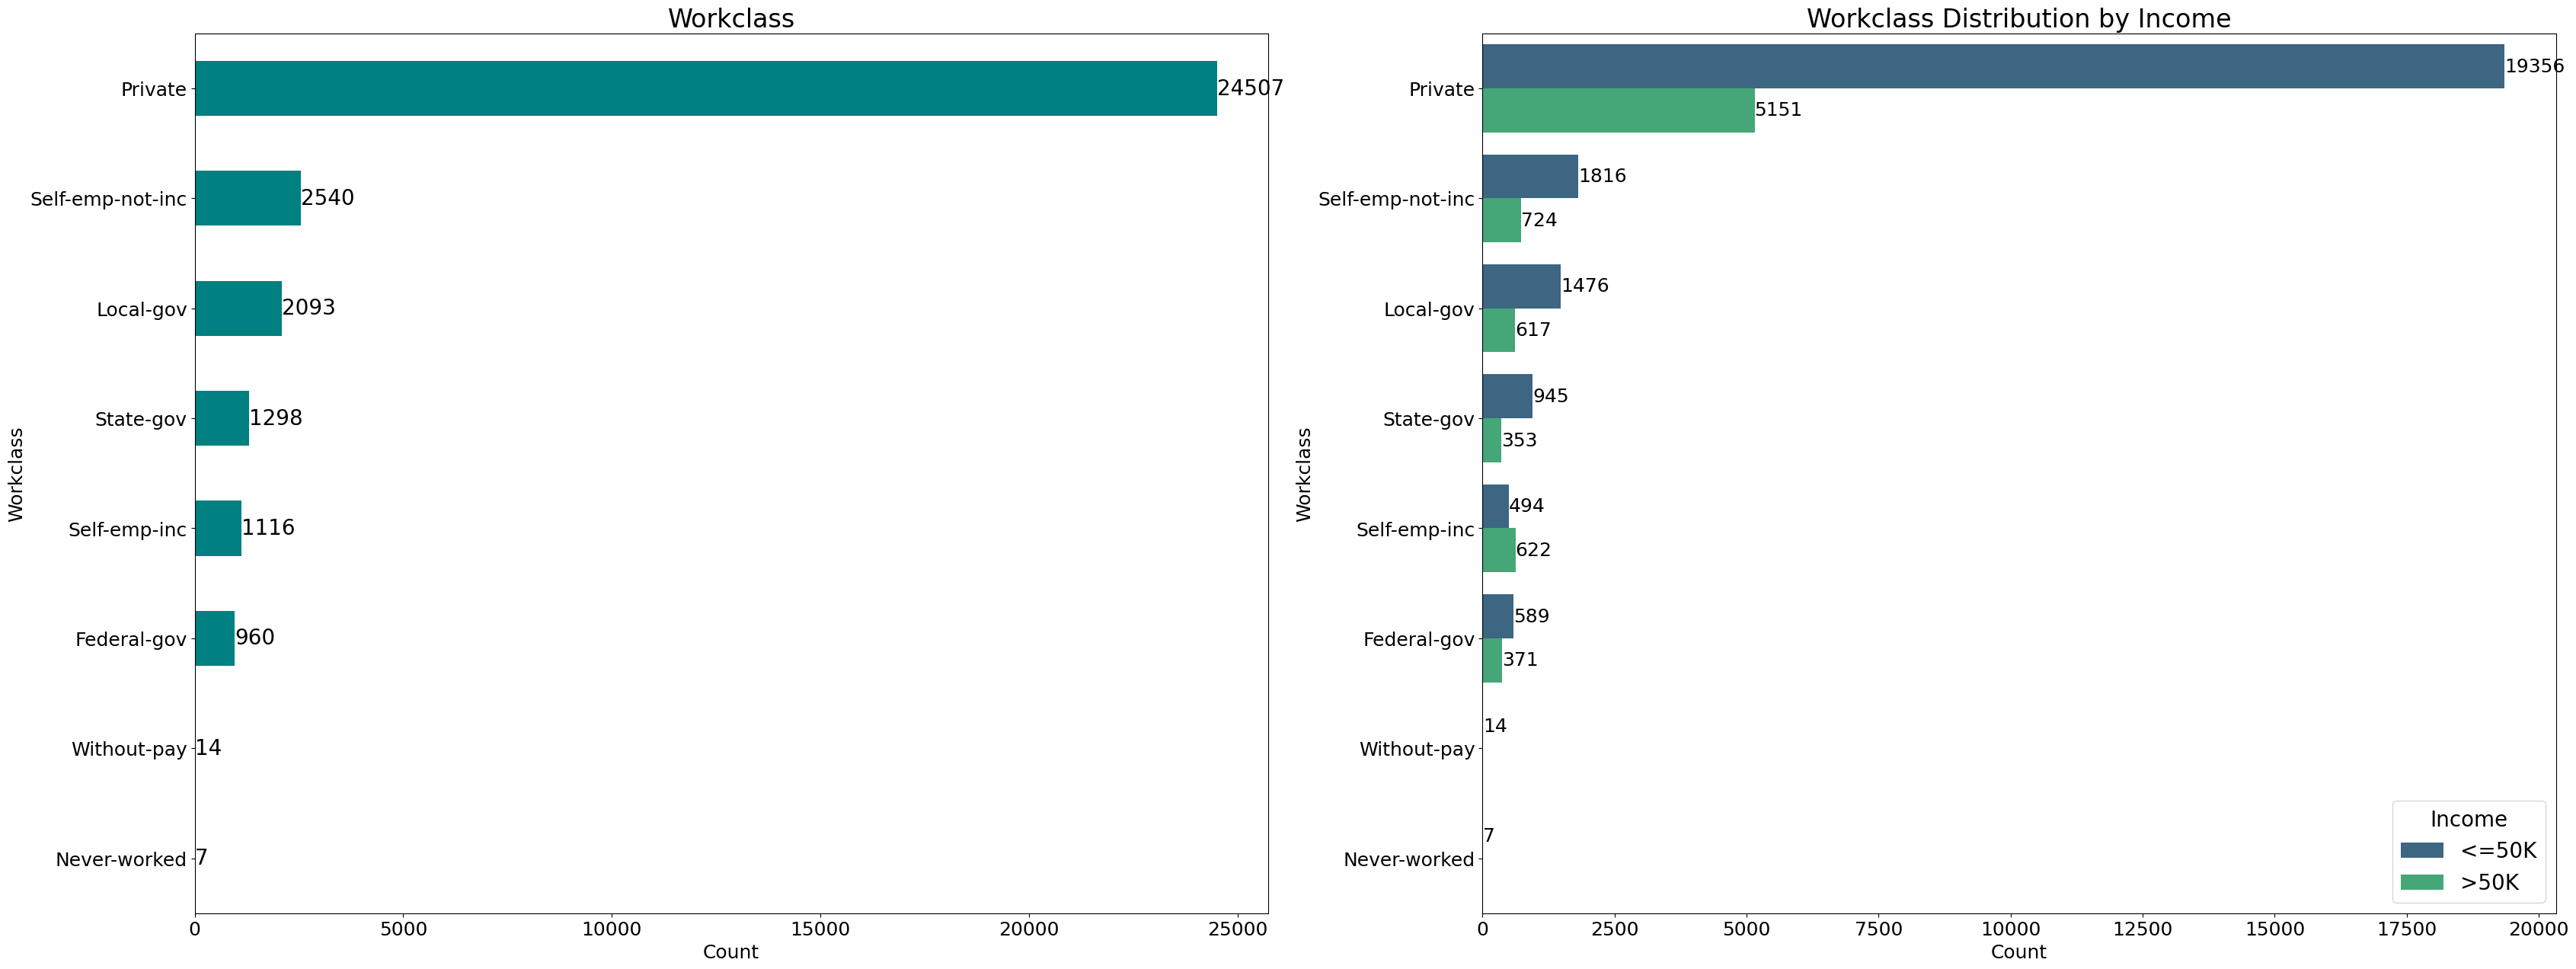

In [153]:
sorted_workclass = ['Private', 'Self-emp-not-inc', 'Local-gov', 'State-gov', 'Self-emp-inc', 'Federal-gov', 'Without-pay', 'Never-worked']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 15))

counts = df['workclass'].value_counts().reindex(sorted_workclass[::-1])
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('Workclass', fontsize=24)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xlabel('Count', fontsize=18) 
ax1.set_ylabel('Workclass', fontsize=18) 

sns.countplot(y=df["workclass"], hue=df['income'].astype(str), ax=ax2, palette='viridis', order=sorted_workclass)
ax2.set_title('Workclass Distribution by Income', fontsize=24)
ax2.legend(title='Income', loc='lower right', fontsize=20, title_fontsize='20')
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xlabel('Count', fontsize=18) 
ax2.set_ylabel('Workclass', fontsize=18);

for container in ax2.containers:
    ax2.bar_label(container, fontsize=18)

- Noteworthy points:
    + Across all workclass categories, <=50K dominates, suggesting a large part of the workforce earns less than 50K annually, regardless of workclass.
    + In the Self-emp-inc category, there is a more balanced distribution, where the number of people earning more than 50K is slightly higher than those earning below 50K.

- Insights:
    + The charts indicate that the private sector provides employment to the majority, but most people in all sectors, including self-employment and government jobs, tend to earn less than 50K.
    + There are specific categories, such as Self-emp-inc, where more people earn higher incomes, but these categories are relatively small compared to the private sector.

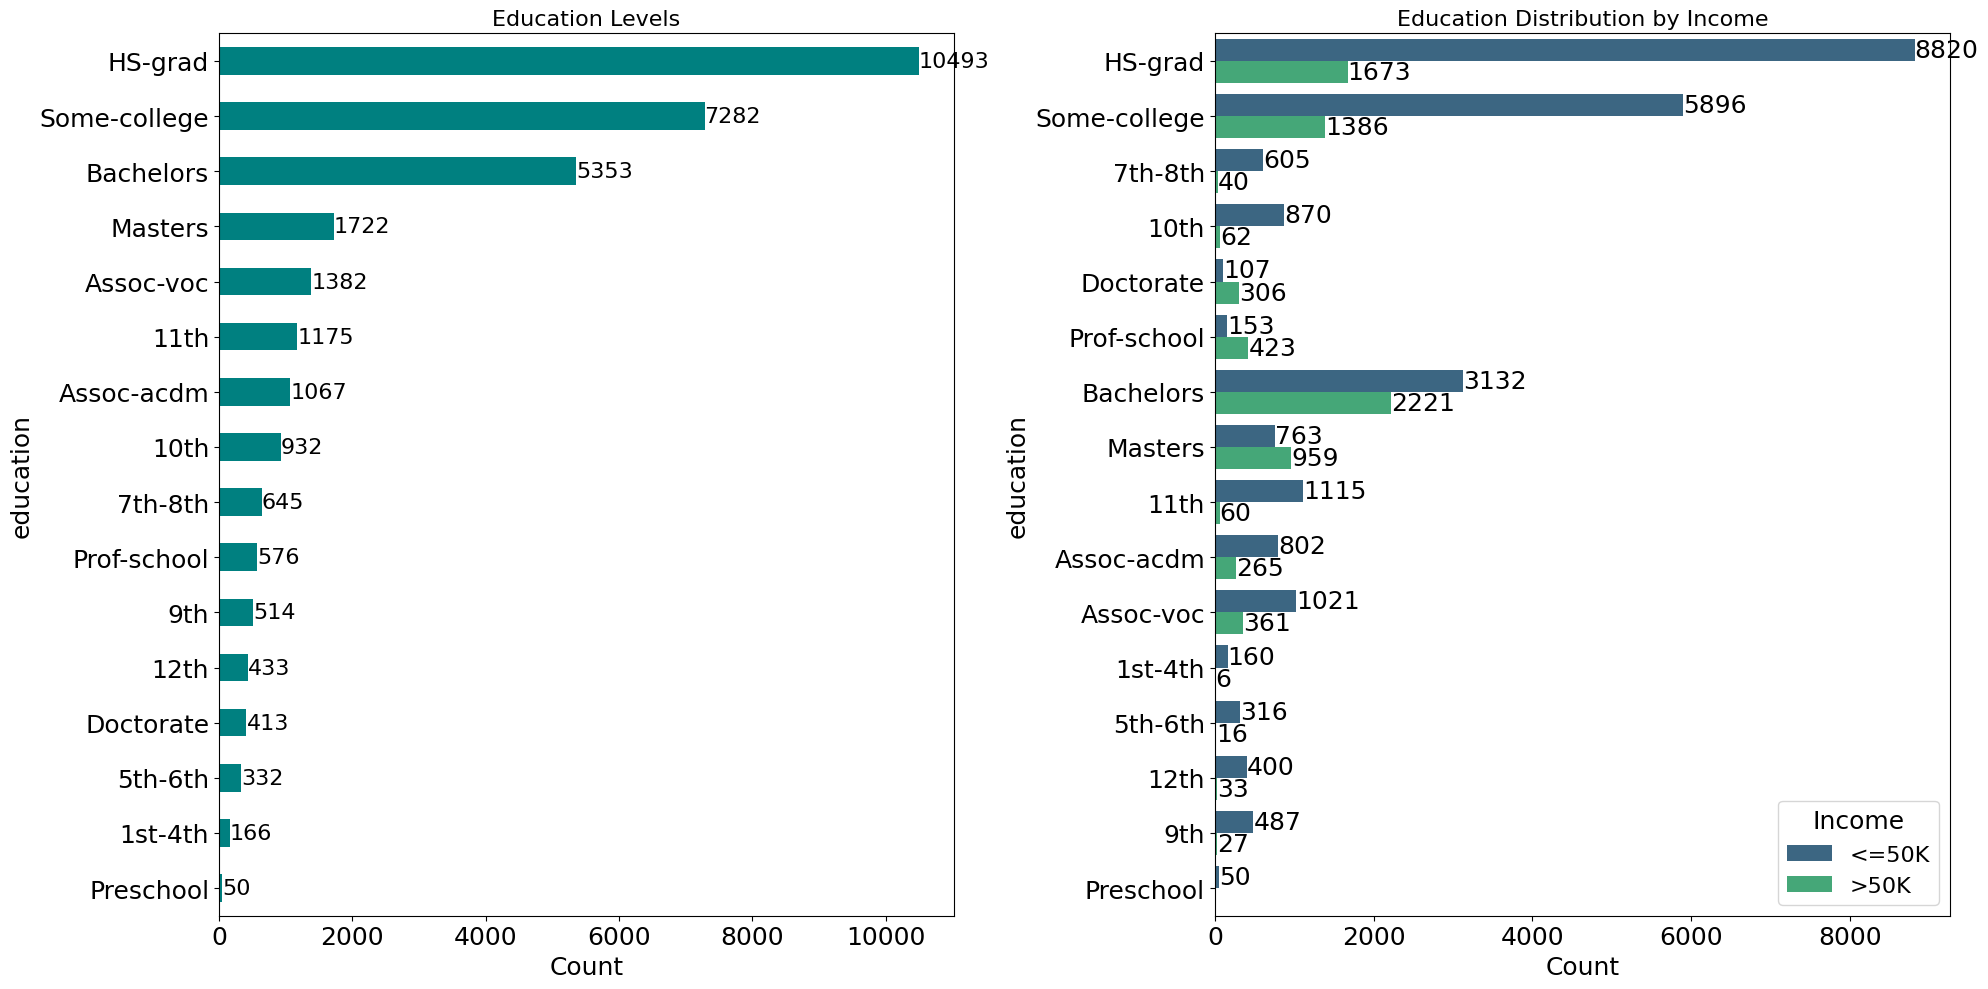

In [157]:
sorted_education = df['education'].value_counts().index[::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Birinci grafik: Top Education Levels
counts = df['education'].value_counts().reindex(sorted_education)
counts.plot(kind="barh", ax=ax1, color="teal")
ax1.set_title('Education Levels', fontsize=16)
ax1.bar_label(ax1.containers[0], labels=counts.values, fontsize=16)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_xlabel('Count', fontsize=18) 
ax1.set_ylabel('education', fontsize=18);

# İkinci grafik: Education Distribution by Income
sns.countplot(y=df["education"], hue=df['income'].astype(str), ax=ax2, palette='viridis')
ax2.set_title('Education Distribution by Income', fontsize=16)
ax2.legend(title='Income', loc='lower right', fontsize=16, title_fontsize='18')
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_xlabel('Count', fontsize=18) 
ax2.set_ylabel('education', fontsize=18);

for container in ax2.containers:
    ax2.bar_label(container, fontsize=18)

plt.tight_layout()
plt.show()

<p align="center">
  <img src="illustration/2.png" alt="Image 1" width="100"/>
  <div style = "height:100%">
    Dividing education levels into too many categories can complicate data analysis and modeling processes. Therefore, similar levels have been combined to form larger and more meaningful categories.
  </div>
</p>
